# Safaitic OCR - Setup and Data Exploration

This notebook helps you:
1. Set up the environment
2. Verify Llama 3.2 Vision is available
3. Explore the Safaitic inscription dataset
4. View sample inscriptions and their metadata

## 1. Setup and Imports

In [1]:
# Add parent directory to path
import sys
from pathlib import Path

# Add src to path
project_root = Path().absolute().parent
sys.path.insert(0, str(project_root))

print(f"Project root: {project_root}")

Project root: /Users/shaigordin/Dropbox/Git-projects/safaitic-ocr


In [2]:
# Import our modules
from src import (
    load_metadata,
    get_inscription_data,
    list_available_inscriptions,
    LlamaVision,
    SafaiticPrompts
)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, HTML
import pandas as pd

# Set pandas display options
pd.set_option('display.max_colwidth', 100)

print("✓ Imports successful")

✓ Imports successful


## 2. Check Llama 3.2 Vision Availability

In [3]:
# Initialize Llama Vision
llama = LlamaVision(model_name="llama3.2-vision")

# Check if model is available
is_available = llama.check_availability()

if is_available:
    print("\n✓ Llama 3.2 Vision is ready to use!")
    
    # Get model info
    info = llama.get_model_info()
    if info:
        print(f"\nModel details:")
        print(f"  Modified: {info.get('modified_at', 'N/A')}")
        print(f"  Size: {info.get('size', 'N/A')} bytes")
else:
    print("\n⚠ Llama 3.2 Vision not available. Please install and set up Ollama first.")

✓ llama3.2-vision is available

✓ Llama 3.2 Vision is ready to use!

Model details:
  Modified: 2025-11-04T17:23:21.167176391+02:00
  Size: N/A bytes


## 3. Load and Explore Metadata

In [4]:
# Load metadata
metadata_path = project_root / "metadata" / "BES15.csv"
df = load_metadata(str(metadata_path))

# Display basic info
print(f"\nDataset Overview:")
print(f"  Total records: {len(df)}")
print(f"  Unique inscriptions: {df['inscription_siglum'].nunique()}")
print(f"  Date range: {df['inscription_siglum'].min()} to {df['inscription_siglum'].max()}")

Loaded 3753 records from /Users/shaigordin/Dropbox/Git-projects/safaitic-ocr/metadata/BES15.csv
Unique inscriptions: 1401

Dataset Overview:
  Total records: 3753
  Unique inscriptions: 1401
  Date range: BES15 1 to BES15 999


In [5]:
# Show sample of metadata
print("\nSample metadata:")
display(df[['filename', 'inscription_siglum', 'transliteration', 'translation']].head(10))


Sample metadata:


filename inscription_siglum  \
0  im0037246.jpg            BES15 1   
1  im0037250.jpg            BES15 1   
2  im0041782.jpg            BES15 1   
3  im0041783.jpg            BES15 1   
4  im0041898.jpg            BES15 1   
5  im0042041.jpg            BES15 1   
6  im0042922.jpg            BES15 1   
7  im0042923.jpg            BES15 1   
8  im0042924.jpg            BES15 1   
9  im0042925.jpg            BES15 1   

                             transliteration  \
0  l ṯfl bn frʾ bn frd w qbr bny -h b h- mẓr   
1  l ṯfl bn frʾ bn frd w qbr bny -h b h- mẓr   
2  l ṯfl bn frʾ bn frd w qbr bny -h b h- mẓr   
3  l ṯfl bn frʾ bn frd w qbr bny -h b h- mẓr   
4  l ṯfl bn frʾ bn frd w qbr bny -h b h- mẓr   
5  l ṯfl bn frʾ bn frd w qbr bny -h b h- mẓr   
6  l ṯfl bn frʾ bn frd w qbr bny -h b h- mẓr   
7  l ṯfl bn frʾ bn frd w qbr bny -h b h- mẓr   
8  l ṯfl bn frʾ bn frd w qbr bny -h b h- mẓr   
9  l ṯfl bn frʾ bn frd w qbr bny -h b h- mẓr   

                                                                 translation  
0  By Ṯfl son of Frʾ son of Frd and he buried his sons at the lookout point.  
1  By Ṯfl son of Frʾ son of Frd and he buried his sons at the lookout point.  
2  By Ṯfl son of Frʾ son of Frd and he buried his sons at the lookout point.  
3  By Ṯfl son of Frʾ son of Frd and he buried his sons at the lookout point.  
4  By Ṯfl son of Frʾ son of Frd and he buried his sons at the lookout point.  
5  By Ṯfl son of Frʾ son of Frd and he buried his sons at the lookout point.  
6  By Ṯfl son of Frʾ son of Frd and he buried his sons at the lookout point.  
7  By Ṯfl son of Frʾ son of Frd and he buried his sons at the lookout point.  
8  By Ṯfl son of Frʾ son of Frd and he buried his sons at the lookout point.  
9  By Ṯfl son of Frʾ son of Frd and he buried his sons at the lookout point.

In [6]:
# List all available inscriptions
inscriptions = list_available_inscriptions(df)
print(f"\nAvailable inscriptions ({len(inscriptions)} total):")
print("First 20:", inscriptions[:20])


Available inscriptions (1401 total):
First 20: ['BES15 1', 'BES15 10', 'BES15 100', 'BES15 1000', 'BES15 1001', 'BES15 1002', 'BES15 1003', 'BES15 1004', 'BES15 1005', 'BES15 1006', 'BES15 1007', 'BES15 1008', 'BES15 1009', 'BES15 101', 'BES15 1010', 'BES15 1011', 'BES15 1012', 'BES15 1013', 'BES15 1014', 'BES15 1015']


## 4. Explore a Sample Inscription

In [7]:
# Load data for BES15 1 (the example with most images)
data_dir = project_root / "data"
inscription = get_inscription_data(df, str(data_dir), "BES15 1", load_images=True)

print(f"Inscription: {inscription.inscription_id}")
print(f"Siglum: {inscription.siglum}")
print(f"\nTransliteration: {inscription.transliteration}")
print(f"\nTranslation: {inscription.translation}")
print(f"\nProvenance: {inscription.provenance}")
print(f"\nNumber of images: {len(inscription.image_files)}")
print(f"OCIANA link: {inscription.ociana_link}")

Loaded 15 images from BES15 1
Inscription: BES15 1
Siglum: BES15

Transliteration: l ṯfl bn frʾ bn frd w qbr bny -h b h- mẓr

Translation: By Ṯfl son of Frʾ son of Frd and he buried his sons at the lookout point.

Provenance: Qāʿ al-ʿAbd, Al-Mafraq Governorate, Jordan

Number of images: 15
OCIANA link: https://ociana.osu.edu/inscriptions/16788


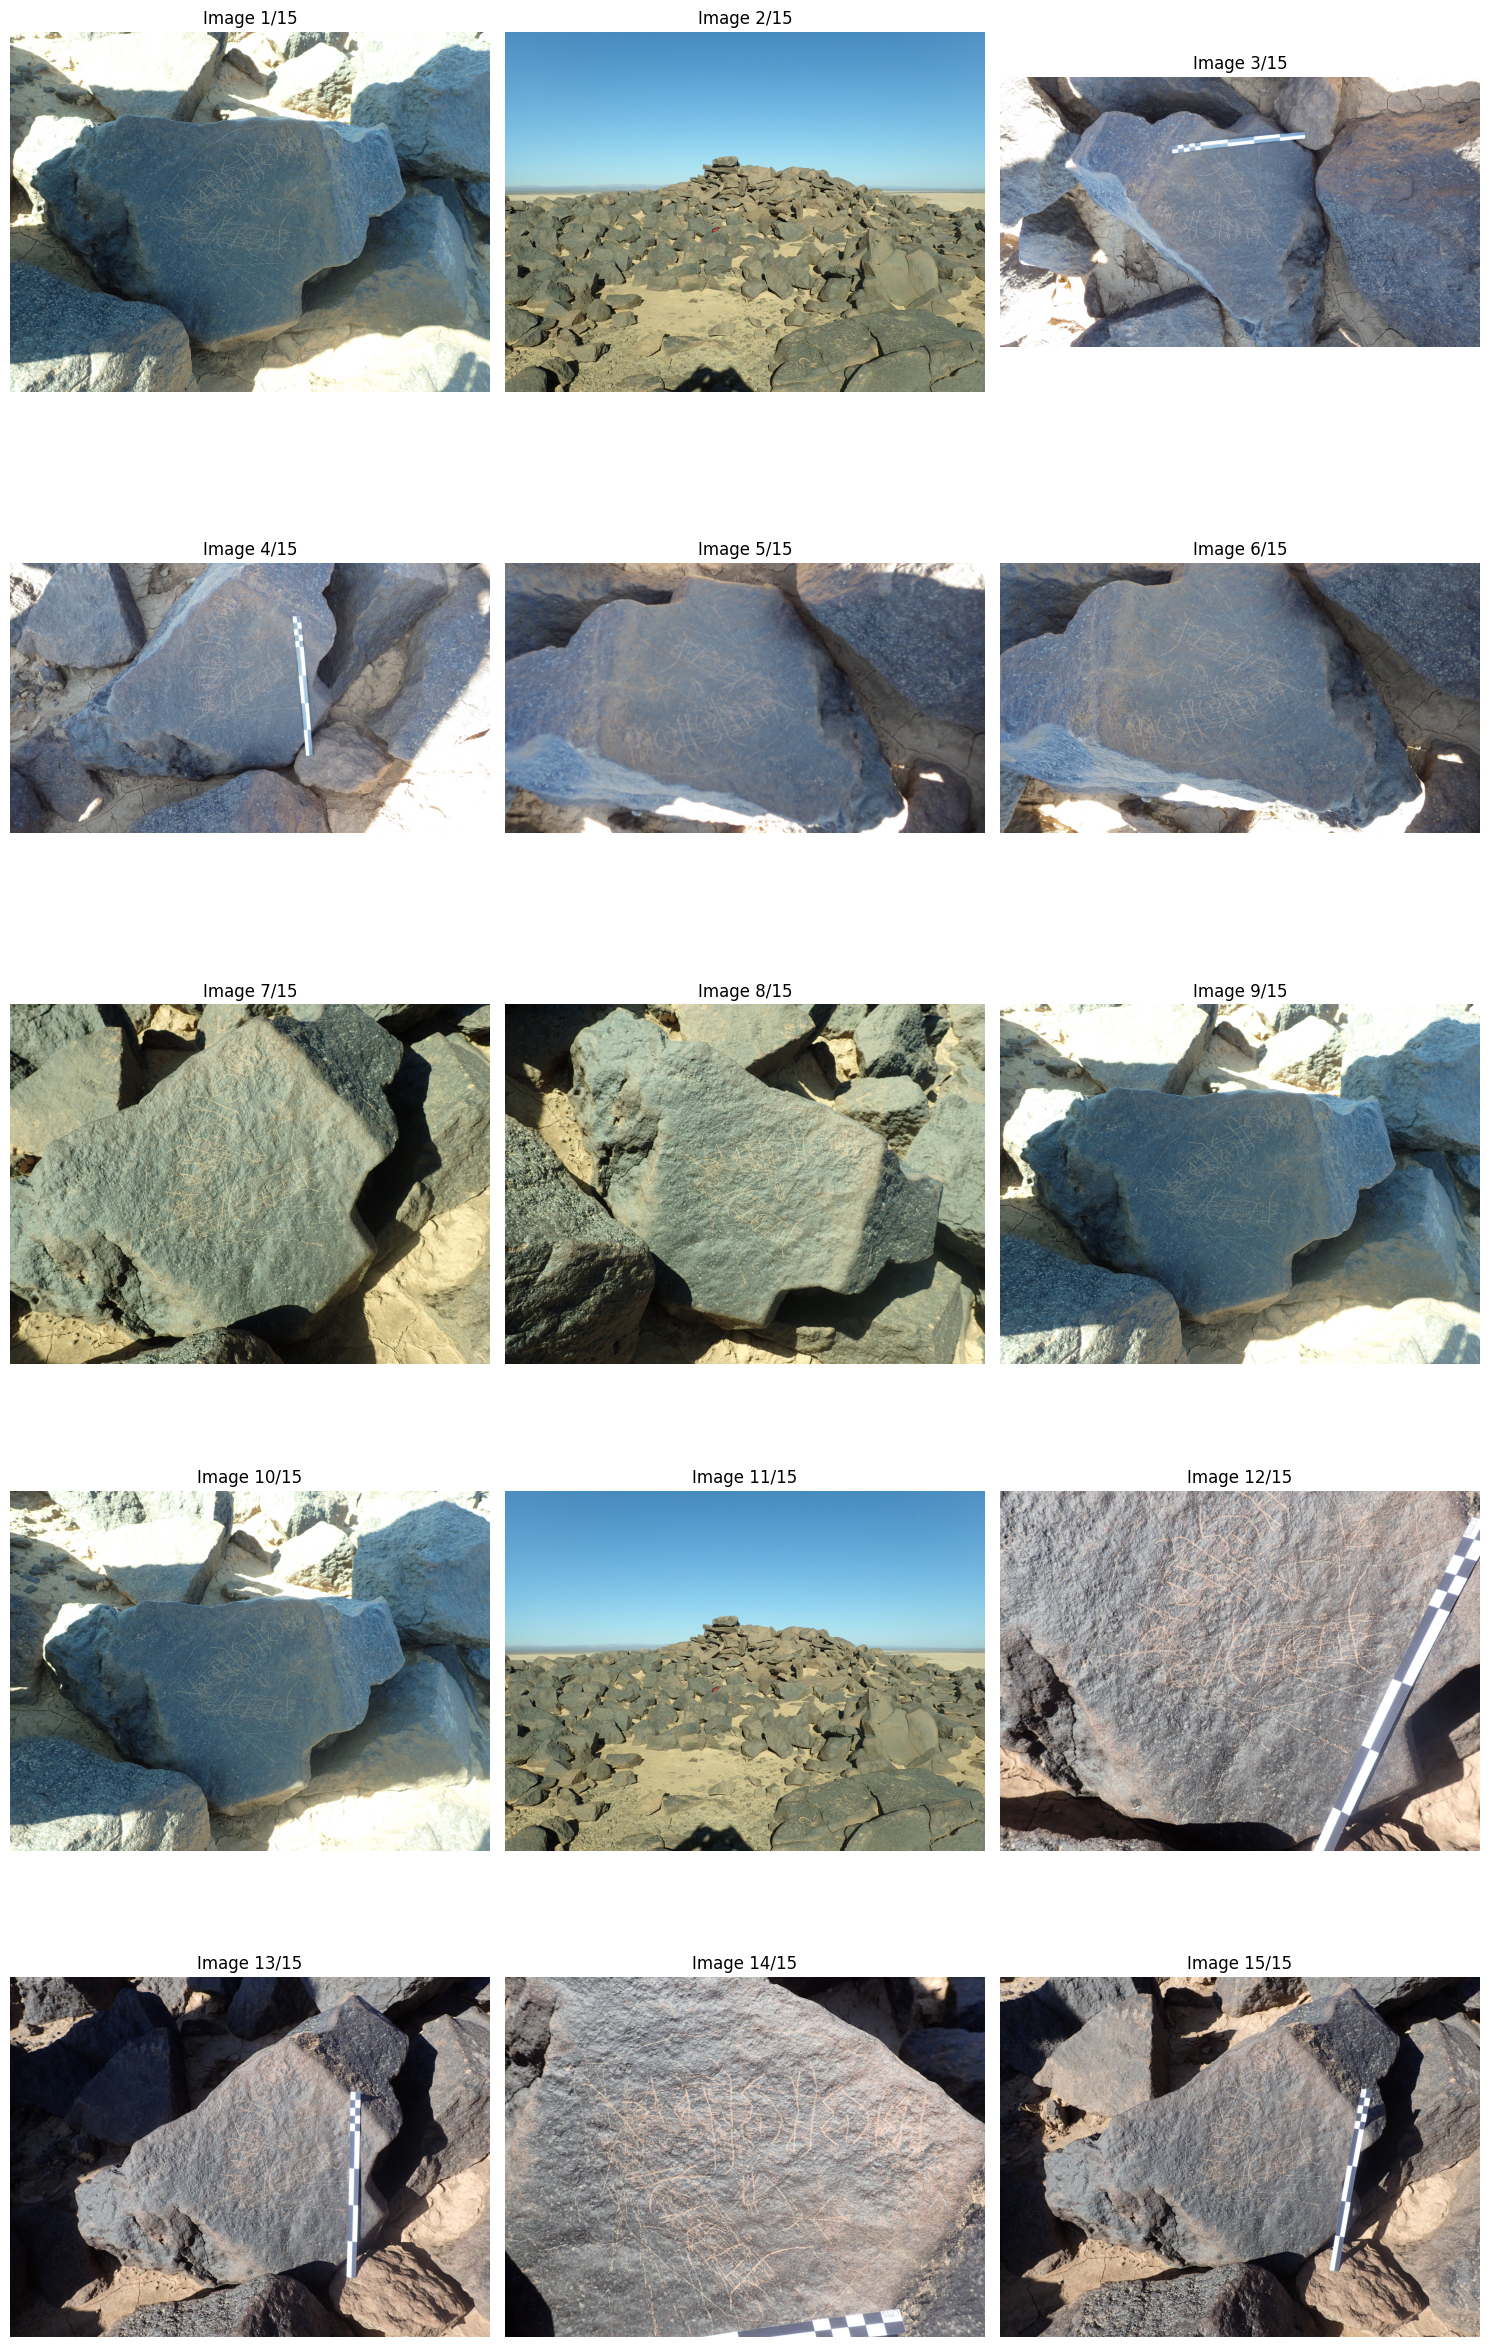

In [8]:
# Display images in a grid
if inscription.images:
    n_images = len(inscription.images)
    n_cols = 3
    n_rows = (n_images + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for idx, img in enumerate(inscription.images):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].imshow(img)
        axes[row, col].set_title(f"Image {idx + 1}/{n_images}")
        axes[row, col].axis('off')
    
    # Hide empty subplots
    for idx in range(n_images, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No images loaded")

## 5. Browse Available Prompts

In [9]:
# Get all available prompts
prompts = SafaiticPrompts.get_all_prompts()

print("Available prompt templates:\n")
for name, prompt_text in prompts.items():
    print(f"\n{'='*60}")
    print(f"Prompt: {name}")
    print(f"{'='*60}")
    print(prompt_text[:200] + "..." if len(prompt_text) > 200 else prompt_text)

Available prompt templates:


Prompt: basic_description
Describe what you see in this image in detail. 
Focus on any text, inscriptions, or writing visible on the stone surface.

Prompt: script_identification
Analyze this image carefully. 

1. Is there any text or inscription visible?
2. If yes, what writing system or script does it appear to be?
3. Describe the characteristics of the characters you see.
4...

Prompt: character_recognition

Background: This is a Safaitic inscription. Safaitic is an ancient North Arabian script 
used by nomadic peoples in the deserts of southern Syria and northern Jordan, 
roughly between the 1st century...

Prompt: transliteration_attempt

Safaitic script uses these letters (with common Latin transliterations):
ʾ, b, g, d, h, w, z, ḥ, ṭ, y, k, l, m, n, s¹, s², ʿ, f, ṣ, q, r, s, t, ṯ, ḫ, ḏ, ḍ, ġ

Common formulae start with "l" (meaning ...

Prompt: translation_attempt
This is a Safaitic inscription, typically written by ancient nomadic peoples.

Common 

## 6. Statistics About the Dataset

Images per inscription statistics:
  Mean: 2.7
  Median: 2
  Min: 1
  Max: 19


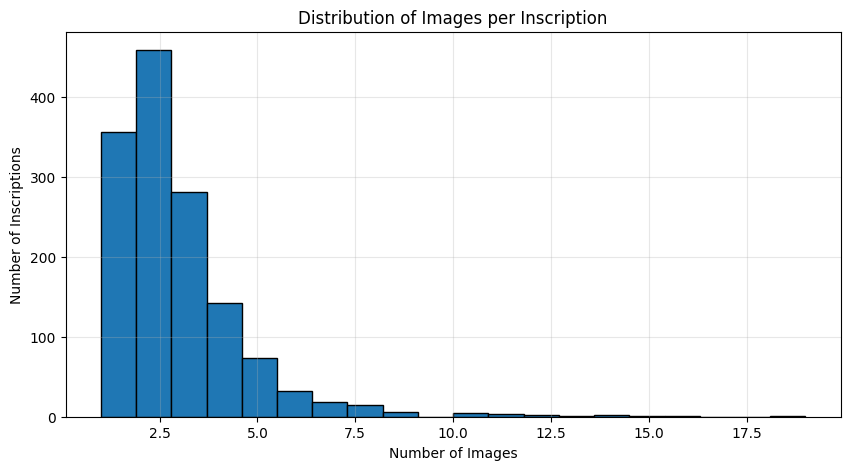

In [10]:
# Images per inscription
images_per_inscr = df.groupby('inscription_siglum').size()

print("Images per inscription statistics:")
print(f"  Mean: {images_per_inscr.mean():.1f}")
print(f"  Median: {images_per_inscr.median():.0f}")
print(f"  Min: {images_per_inscr.min()}")
print(f"  Max: {images_per_inscr.max()}")

# Plot distribution
plt.figure(figsize=(10, 5))
plt.hist(images_per_inscr, bins=20, edgecolor='black')
plt.xlabel('Number of Images')
plt.ylabel('Number of Inscriptions')
plt.title('Distribution of Images per Inscription')
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
# Transliteration length statistics
df['translit_length'] = df['transliteration'].fillna('').str.len()

print("\nTransliteration length statistics:")
print(f"  Mean: {df['translit_length'].mean():.1f} characters")
print(f"  Median: {df['translit_length'].median():.0f} characters")
print(f"  Range: {df['translit_length'].min()}-{df['translit_length'].max()} characters")

# Top 10 longest inscriptions
print("\nLongest inscriptions:")
longest = df.nlargest(10, 'translit_length')[['inscription_siglum', 'transliteration', 'translit_length']]
display(longest)


Transliteration length statistics:
  Mean: 22.8 characters
  Median: 18 characters
  Range: 1-193 characters

Longest inscriptions:


inscription_siglum  \
2444          BES15 813   
2445          BES15 813   
2446          BES15 813   
2447          BES15 813   
2448          BES15 813   
2449          BES15 813   
2450          BES15 813   
2451          BES15 813   
2452          BES15 813   
2453          BES15 813   

                                                                                          transliteration  \
2444  l ʿm bn ʾtm bn ʿm bn mṭrw w rʿy h- ḍʾnt ḏ- ʾl ġṯr w wgm ʿl- ʿm -h w ḫrṣ ʾḫ -h f h lt qbl s¹lm w ...   
2445  l ʿm bn ʾtm bn ʿm bn mṭrw w rʿy h- ḍʾnt ḏ- ʾl ġṯr w wgm ʿl- ʿm -h w ḫrṣ ʾḫ -h f h lt qbl s¹lm w ...   
2446  l ʿm bn ʾtm bn ʿm bn mṭrw w rʿy h- ḍʾnt ḏ- ʾl ġṯr w wgm ʿl- ʿm -h w ḫrṣ ʾḫ -h f h lt qbl s¹lm w ...   
2447  l ʿm bn ʾtm bn ʿm bn mṭrw w rʿy h- ḍʾnt ḏ- ʾl ġṯr w wgm ʿl- ʿm -h w ḫrṣ ʾḫ -h f h lt qbl s¹lm w ...   
2448  l ʿm bn ʾtm bn ʿm bn mṭrw w rʿy h- ḍʾnt ḏ- ʾl ġṯr w wgm ʿl- ʿm -h w ḫrṣ ʾḫ -h f h lt qbl s¹lm w ...   
2449  l ʿm bn ʾtm bn ʿm bn mṭrw w rʿy h- ḍʾnt ḏ- ʾl ġṯr w wgm ʿl- ʿm -h w ḫrṣ ʾḫ -h f h lt qbl s¹lm w ...   
2450  l ʿm bn ʾtm bn ʿm bn mṭrw w rʿy h- ḍʾnt ḏ- ʾl ġṯr w wgm ʿl- ʿm -h w ḫrṣ ʾḫ -h f h lt qbl s¹lm w ...   
2451  l ʿm bn ʾtm bn ʿm bn mṭrw w rʿy h- ḍʾnt ḏ- ʾl ġṯr w wgm ʿl- ʿm -h w ḫrṣ ʾḫ -h f h lt qbl s¹lm w ...   
2452  l ʿm bn ʾtm bn ʿm bn mṭrw w rʿy h- ḍʾnt ḏ- ʾl ġṯr w wgm ʿl- ʿm -h w ḫrṣ ʾḫ -h f h lt qbl s¹lm w ...   
2453  l ʿm bn ʾtm bn ʿm bn mṭrw w rʿy h- ḍʾnt ḏ- ʾl ġṯr w wgm ʿl- ʿm -h w ḫrṣ ʾḫ -h f h lt qbl s¹lm w ...   

      translit_length  
2444              193  
2445              193  
2446              193  
2447              193  
2448              193  
2449              193  
2450              193  
2451              193  
2452              193  
2453              193

## Next Steps

Now that you've explored the dataset and verified Llama 3.2 Vision is working:

1. **02_single_image_test.ipynb** - Test the model on individual inscriptions
2. **03_batch_evaluation.ipynb** - Run systematic evaluations across multiple inscriptions

You can also experiment with different inscriptions and prompts in this notebook!